In [1]:
from code.reinforce import *
import matplotlib.pyplot as plt
%matplotlib inline

#### mask点是0，允许改动点是1

In [2]:
predict_model = score_model(model_path = "model/transformer1008A1.pth")
#predict_model = score_model(model_path = "model/transformer1008A424.pth")

In [3]:
init = "FKFEFKFEFK"
init = explain().symbol2index(init)
print(predict_model.predict(init))

1.9638932943344116


In [5]:
epoch = 1000
mcts = MonteCarloTreeSearch(sequence_length = len(init), 
                            num_choices = 20,
                            predictor = predict_model,
                            differ = 5,
                            mask = [1,1,0,0,0,0,0,0,1,1])
mcts.search(iterations=epoch, init = init)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
best_sequence = mcts.get_best_sequence()
print(f"Start\t{mcts.simulate(mcts.start):.4f}: {mcts.start}")
#print(f"Final\t{mcts.simulate(best_sequence):.4f}: {best_sequence}")
print(f"Best\t{mcts.highest:.4f}: {mcts.highest_sequence}")
print(f"{explain().index2symbol(mcts.highest_sequence)}")

Start	1.9639: [5, 9, 5, 4, 5, 9, 5, 4, 5, 9]
Best	2.0312: [20, 10, 5, 4, 5, 9, 5, 4, 19, 19]
YLFEFKFEWW


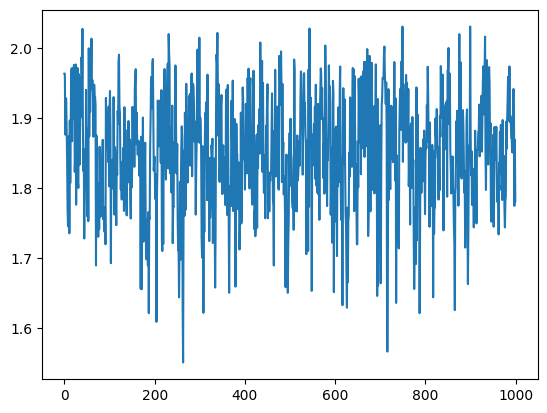

In [7]:
plt.plot(np.arange(epoch), mcts.history)

### predict

In [8]:
input_sequence = "WWIMSDDAWW"
input_sequence = explain().symbol2index(input_sequence)
predict_model.predict(input_sequence)

1.9556435346603394